<a href="https://colab.research.google.com/github/rebuyguy2000/ex-date-payday-public/blob/main/yfinance_dividend_price_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dividend scraper code
#goal is to screen and purchase high paying dividend instruments using a modified dividend capture strategy
# step 1. capture all dividend ex-dates on Nasdaq Dividend Calendar website
# step 2. parse the symbols and ex-dates into a csv file
# step 3. extract historical prices for all symbols that includes 7 days plus/minus the ex-date
# step 4. use pricing data for statistical analysis on each symbol
# step 5. is there a correlation between price increase in the days leading up to the ex-date?
# step 6. how many days leading up to the ex-date are price changes relevant?

In [ ]:
# install yfinance data api for python
# code reference https://pypi.org/project/yfinance/
!pip install yfinance

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import csv
import matplotlib.pyplot as plt
from pandas_datareader import data


In [ ]:
# initialize ticker variable
# retrieves all dividend and stock splits for ticker

ticker = 'xflt'
symbol = yf.Ticker(ticker)
symbol.actions

In [ ]:
# retrieves dividend and payout history for ticker

ticker = 'pzn'
data.DataReader(ticker, 'yahoo-actions')

,action,value
2021-02-11,DIVIDEND,0.25
2020-10-29,DIVIDEND,0.03
2020-08-06,DIVIDEND,0.03
2020-04-30,DIVIDEND,0.03
2020-02-13,DIVIDEND,0.46
2019-10-28,DIVIDEND,0.03
2019-07-29,DIVIDEND,0.03
2019-04-29,DIVIDEND,0.03
2019-02-14,DIVIDEND,0.49
2018-10-29,DIVIDEND,0.03


In [ ]:
# download ticker info by date range into dataframe
#hist = symbol.history(period="1mo")

df_yahoo = yf.download(ticker, start='2021-01-11', end='2021-02-12',progress=False,auto_adjust=True,actions="inline")

In [ ]:
# moving average calculations

ShortEMA = df_yahoo.Close.ewm(span=2, adjust=True).mean()
MediumEMA = df_yahoo.Close.ewm(span=10, adjust=True).mean()

#MediumEMA
#ShortEMA

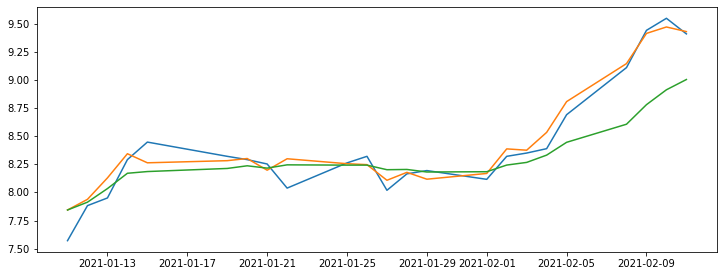

In [ ]:
# plot line graph
plt.figure(figsize=(12.2,4.5))
plt.plot(df_yahoo['Open'])
plt.plot(ShortEMA)
plt.plot(MediumEMA)
plt.show()

In [ ]:
# moving average calculations
ShortEMA = df_yahoo.Close.ewm(span=2, adjust=True).mean()
MediumEMA = df_yahoo.Close.ewm(span=10, adjust=True).mean()

print(MediumEMA.keys)
print(ShortEMA)

<bound method Series.keys of Date
2021-02-17    3.030000
2021-02-18    3.024500
2021-02-19    3.042791
2021-02-22    3.048460
2021-02-23    3.046032
2021-02-24    3.049660
2021-02-25    3.037694
2021-02-26    3.033668
2021-03-01    3.035046
2021-03-02    3.033986
2021-03-03    3.035215
2021-03-04    3.018189
2021-03-05    3.000880
2021-03-08    3.000710
2021-03-09    3.004399
2021-03-10    3.016828
2021-03-11    3.011783
2021-03-12    3.033874
2021-03-15    3.068479
2021-03-16    3.085426
Name: Close, dtype: float64>
Date
2021-02-17    3.030000
2021-02-18    3.022500
2021-02-19    3.055385
2021-02-22    3.058500
2021-02-23    3.046116
2021-02-24    3.055385
2021-02-25    3.018445
2021-02-26    3.019482
2021-03-01    3.033161
2021-03-02    3.031054
2021-03-03    3.037018
2021-03-04    2.979006
2021-03-05    2.946335
2021-03-08    2.982112
2021-03-09    3.007371
2021-03-10    3.049123
2021-03-11    3.009708
2021-03-12    3.089903
2021-03-15    3.176634
2021-03-16    3.165545
Name: Close,